In [57]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import datetime

In [88]:
df = pd.read_csv(Path('JNorth_Adult_First_Site_2021_Spring.csv'))
df.head()
df['Date'] =  pd.to_datetime(df['Date'], format='%m/%d/%Y')


df.dtypes

Date              datetime64[ns]
Town                      object
State/Province            object
Latitude                 float64
Longitude                float64
Number                   float64
dtype: object

In [97]:
df.dropna(inplace=True)
df['Date'].dt.year

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
3451    2021
3452    2021
3453    2021
3454    2021
3455    2021
Name: Date, Length: 3450, dtype: int64

In [98]:
# adding a column for year
#df['year'] = pd.DatetimeIndex(df['Date']).dt.year
#df['year'] = pd.to_datetime(df['year'], format='%Y', errors='coerce')
df['year'] = pd.DatetimeIndex(df['Date']).year
# df['year'] = pd.to_datetime(df['year'], format= '%Y', errors='coerce')

df.head()
# df.dtypes

,Date,Town,State/Province,Latitude,Longitude,Number,year
0,2021-07-31,Basking Ridge,NJ,40.7,-74.5,1.0,2021
1,2021-07-31,Brown City,MI,43.2,-83.1,10.0,2021
2,2021-07-31,Hardwick,MA,42.3,-72.2,1.0,2021
3,2021-07-31,Hilton Head Island,SC,32.2,-80.8,2.0,2021
4,2021-07-31,Montgomery Village,MD,39.2,-77.2,2.0,2021


In [99]:
# Adding a column for month

df['month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,Date,Town,State/Province,Latitude,Longitude,Number,year,month
0,2021-07-31,Basking Ridge,NJ,40.7,-74.5,1.0,2021,7
1,2021-07-31,Brown City,MI,43.2,-83.1,10.0,2021,7
2,2021-07-31,Hardwick,MA,42.3,-72.2,1.0,2021,7
3,2021-07-31,Hilton Head Island,SC,32.2,-80.8,2.0,2021,7
4,2021-07-31,Montgomery Village,MD,39.2,-77.2,2.0,2021,7


In [100]:
# dropping null vals
df.year = df.year.dropna()
df.month = df.month.dropna()

In [112]:
# combining the year and month
df.year = df.year.apply(lambda row: int(row))
df['month_and_year'] = pd.to_datetime(df.month.astype(str) + '-' + df.year.astype(str))
df.head()

,Date,Town,State/Province,Latitude,Longitude,Number,year,month,month_and_year
0,2021-07-31,Basking Ridge,NJ,40.7,-74.5,1.0,2021,7,2021-07-01
1,2021-07-31,Brown City,MI,43.2,-83.1,10.0,2021,7,2021-07-01
2,2021-07-31,Hardwick,MA,42.3,-72.2,1.0,2021,7,2021-07-01
3,2021-07-31,Hilton Head Island,SC,32.2,-80.8,2.0,2021,7,2021-07-01
4,2021-07-31,Montgomery Village,MD,39.2,-77.2,2.0,2021,7,2021-07-01


In [113]:
# grouping by month and assuring month isn't an index
counts = df.groupby(["month_and_year"]).count()
counts = counts.reset_index()
counts.head(200)

,month_and_year,Date,Town,State/Province,Latitude,Longitude,Number,year,month
0,2021-01-01,2,2,2,2,2,2,2,2
1,2021-02-01,26,26,26,26,26,26,26,26
2,2021-03-01,520,520,520,520,520,520,520,520
3,2021-04-01,468,468,468,468,468,468,468,468
4,2021-05-01,1087,1087,1087,1087,1087,1087,1087,1087
5,2021-06-01,739,739,739,739,739,739,739,739
6,2021-07-01,608,608,608,608,608,608,608,608


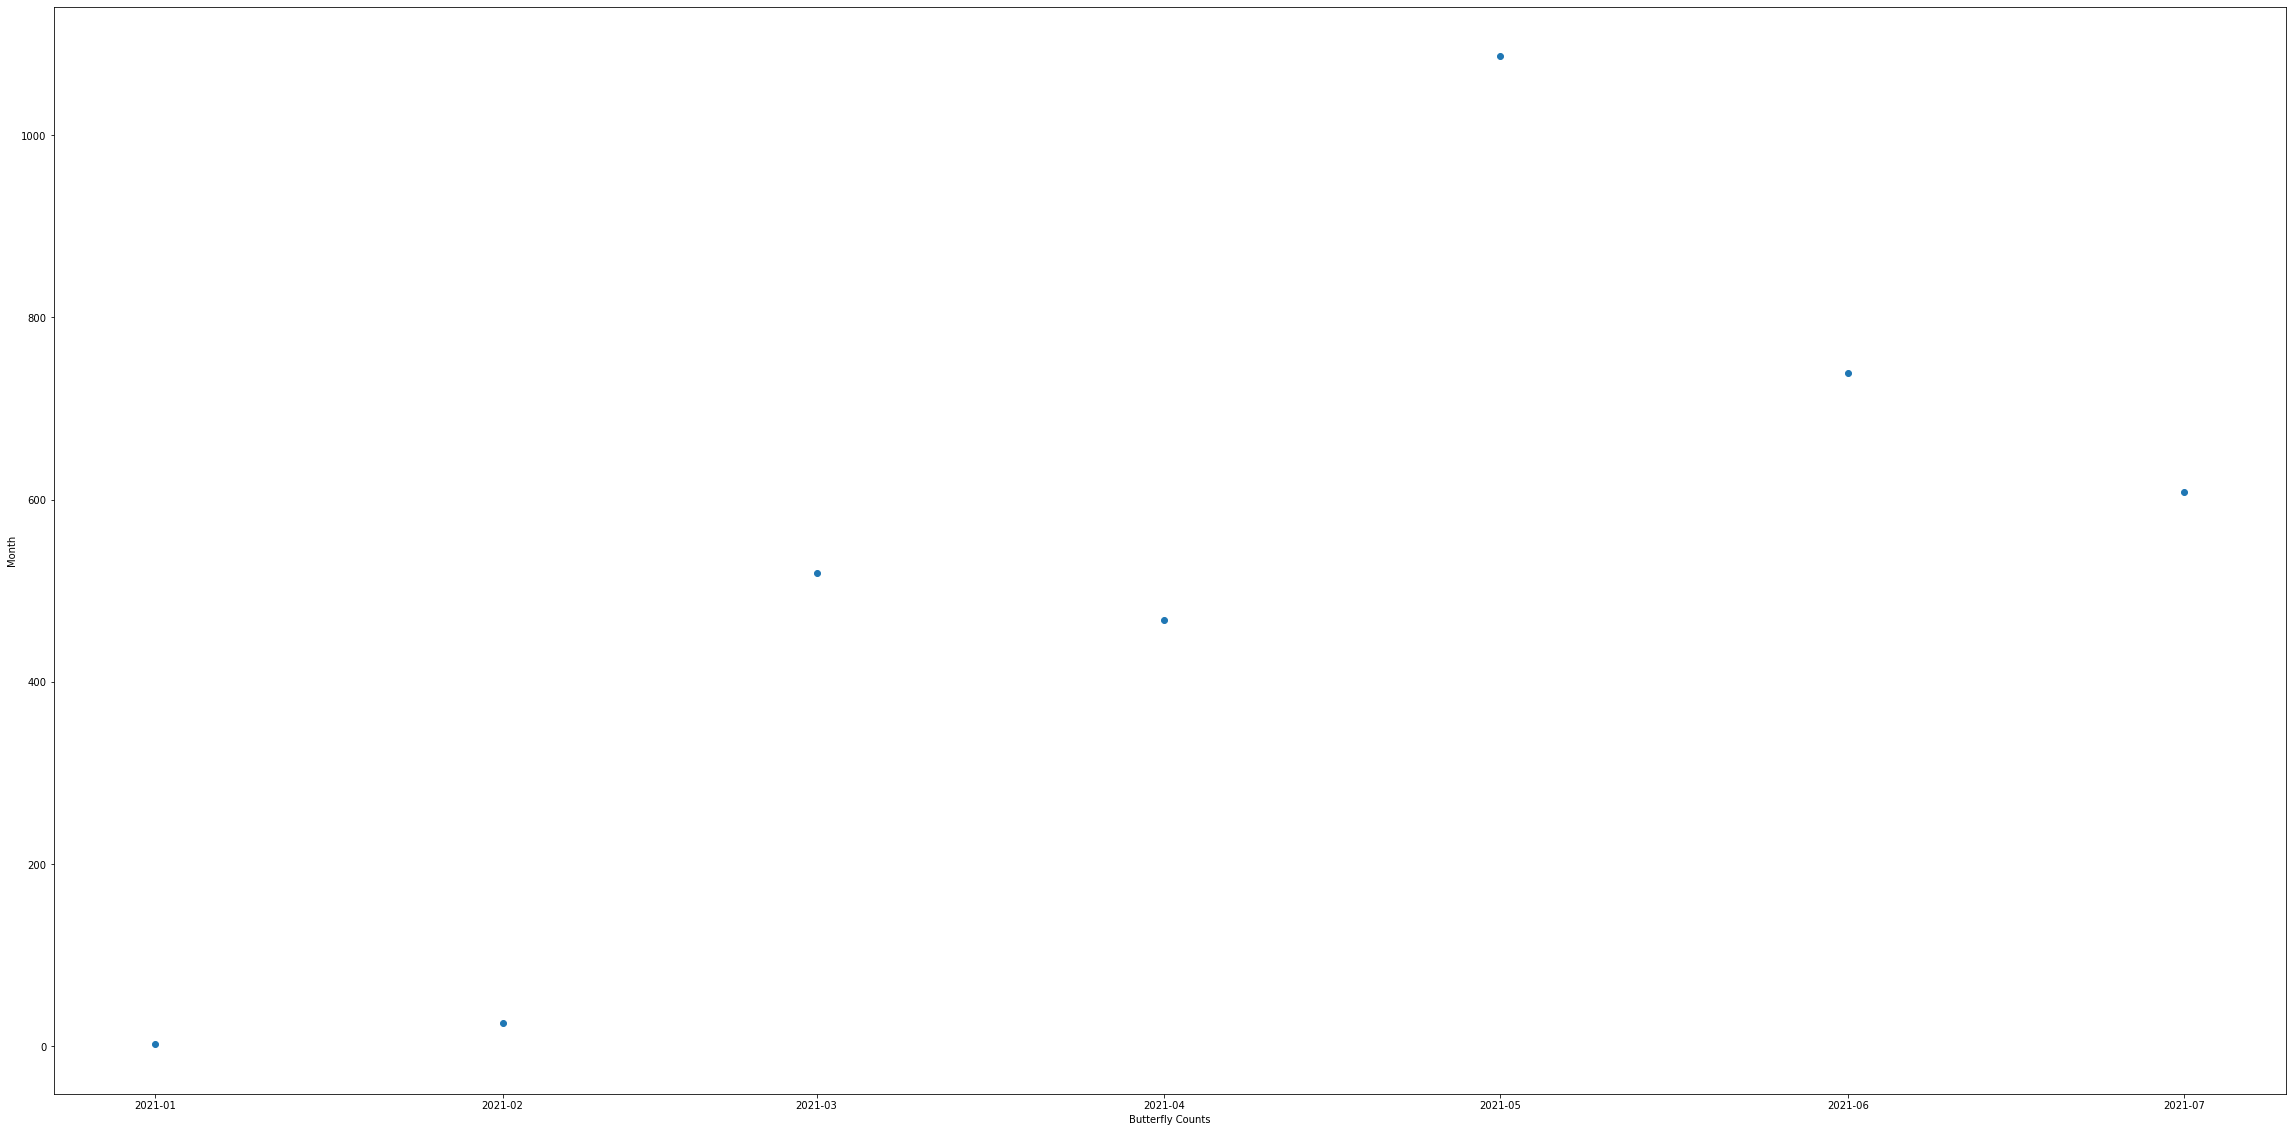

In [114]:
# initial graph. note y-axis with counts.Date is a COUNT of total dates grouped by month; it is not the actual date
fig = plt.figure(figsize=(40, 20))
plt.scatter(counts.month_and_year, counts.Date)
plt.xlabel('Butterfly Counts')
plt.ylabel('Month')

plt.show()

In [115]:
# using reshape
counts["month_and_year"] = counts["month_and_year"].apply(lambda x: x.toordinal())
#counts["month_and_year"] = counts["month_and_year"].astype(float)
X = counts.month_and_year.values.reshape(-1, 1)


In [116]:
# setting the y axis as the count of dates
y = counts.Date

In [117]:
# setting the model
model = LinearRegression()

In [118]:
# fitting the model
model.fit(X, y)

LinearRegression()

In [119]:
# number of predictions
y_pred = model.predict(X)
print(y_pred.shape)

(7,)


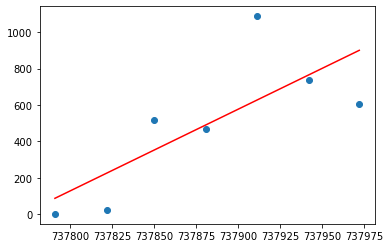

In [120]:
# a straight line for linear regression
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [121]:
# creating a polynomial function that allows us to input degrees for fitting
def fit_and_plot_poly_deg(degree):
    poly_feat = PolynomialFeatures(degree)
    X_poly = poly_feat.fit_transform(X)
    
    print('X_poly shape is: {}'.format(str(X_poly.shape)))

    poly_model = LinearRegression().fit(X_poly, y)
    y_pred = poly_model.predict(X_poly)

    plt.scatter(X, y, zorder=3)
    plt.plot(X, y_pred, color='black');

X_poly shape is: (7, 3)


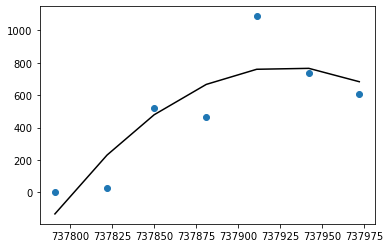

In [122]:
# two degree fit
fit_and_plot_poly_deg(2)

X_poly shape is: (7, 4)


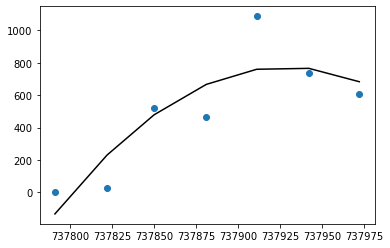

In [123]:
# 3rd degree fit
fit_and_plot_poly_deg(3)

X_poly shape is: (7, 5)


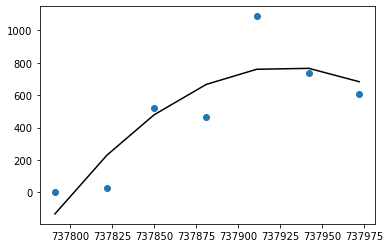

In [124]:
# 4th degree
fit_and_plot_poly_deg(4)